In [15]:
# !pip install pyarrow 

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import spearmanr, ks_2samp, chi2_contingency
from scipy.stats import f_oneway
import matplotlib.dates as mdates
# from pandas_profiling import ProfileReport
from matplotlib import rcParams
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', 100)
np.random.seed(22)
random.seed(22)

In [137]:
data_dir = '../Data/Raw/'
contraceptive_logistics_data = pd.read_csv(data_dir+'Train(2).csv')
contraceptive_case = pd.read_csv(data_dir+'contraceptive_case_data_annual.csv')
monthly_cases = pd.read_csv(data_dir+'monthly_cases.csv')
annual_cases = pd.read_csv(data_dir+'annual_cases.csv')
service_delivery_site = pd.read_csv(data_dir+'service_delivery_site_data.csv')

In [138]:
contraceptive_logistics_data.head()

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
0,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,75,0,21,-54,0,18,0,100.00
1,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27132,3,0,3,0,0,2,0,10.00
2,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27000,0,75,22,0,53,9,0,0.00
3,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27137,2,0,0,0,2,0,0,0.00
4,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27138,45,0,2,0,43,1,0,0.00


In [139]:
contraceptive_logistics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35753 entries, 0 to 35752
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         35753 non-null  int64  
 1   month                        35753 non-null  int64  
 2   region                       35753 non-null  object 
 3   district                     35753 non-null  object 
 4   site_code                    35753 non-null  object 
 5   product_code                 35753 non-null  object 
 6   stock_initial                35753 non-null  int64  
 7   stock_received               35753 non-null  int64  
 8   stock_distributed            35753 non-null  int64  
 9   stock_adjustment             35753 non-null  int64  
 10  stock_end                    35753 non-null  int64  
 11  average_monthly_consumption  35753 non-null  int64  
 12  stock_stockout_days          35753 non-null  int64  
 13  stock_ordered   

In [140]:
contraceptive_logistics_data.describe()

,year,month,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
count,35753.00,35753.00,35753.00,35753.00,35753.00,35753.00,35753.00,35753.00,35753.00,34990.00
mean,2017.43,6.17,63.25,14.85,14.76,0.96,64.29,14.61,0.00,26.66
std,1.02,3.43,168.66,70.63,39.85,37.88,170.85,32.52,0.00,107.17
min,2016.00,1.00,0.00,0.00,0.00,-1440.00,0.00,0.00,0.00,0.00
25%,2017.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2017.00,6.00,12.00,0.00,1.00,0.00,13.00,3.00,0.00,0.00
75%,2018.00,9.00,69.00,0.00,13.00,0.00,70.00,16.00,0.00,20.00
max,2019.00,12.00,4320.00,3534.00,1728.00,3003.00,4320.00,864.00,0.00,10240.00


In [141]:
# A check on the % of districts in both the contraceptive_logistics_data and annual_cases, annual_cases
100* len(set(contraceptive_logistics_data.district).intersection(annual_cases.district))/annual_cases.district.nunique()

61.94690265486726

In [142]:
service_delivery_site.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   site_code       156 non-null    object 
 1   site_type       156 non-null    object 
 2   site_region     156 non-null    object 
 3   site_district   156 non-null    object 
 4   site_latitude   156 non-null    float64
 5   site_longitude  156 non-null    float64
dtypes: float64(2), object(4)
memory usage: 7.4+ KB


In [143]:
df_merge = pd.merge(contraceptive_logistics_data, service_delivery_site[['site_code', 'site_type']], on='site_code', how='left')

In [144]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35753 entries, 0 to 35752
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         35753 non-null  int64  
 1   month                        35753 non-null  int64  
 2   region                       35753 non-null  object 
 3   district                     35753 non-null  object 
 4   site_code                    35753 non-null  object 
 5   product_code                 35753 non-null  object 
 6   stock_initial                35753 non-null  int64  
 7   stock_received               35753 non-null  int64  
 8   stock_distributed            35753 non-null  int64  
 9   stock_adjustment             35753 non-null  int64  
 10  stock_end                    35753 non-null  int64  
 11  average_monthly_consumption  35753 non-null  int64  
 12  stock_stockout_days          35753 non-null  int64  
 13  stock_ordered   

In [145]:
df_merge.describe()

,year,month,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
count,35753.00,35753.00,35753.00,35753.00,35753.00,35753.00,35753.00,35753.00,35753.00,34990.00
mean,2017.43,6.17,63.25,14.85,14.76,0.96,64.29,14.61,0.00,26.66
std,1.02,3.43,168.66,70.63,39.85,37.88,170.85,32.52,0.00,107.17
min,2016.00,1.00,0.00,0.00,0.00,-1440.00,0.00,0.00,0.00,0.00
25%,2017.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2017.00,6.00,12.00,0.00,1.00,0.00,13.00,3.00,0.00,0.00
75%,2018.00,9.00,69.00,0.00,13.00,0.00,70.00,16.00,0.00,20.00
max,2019.00,12.00,4320.00,3534.00,1728.00,3003.00,4320.00,864.00,0.00,10240.00


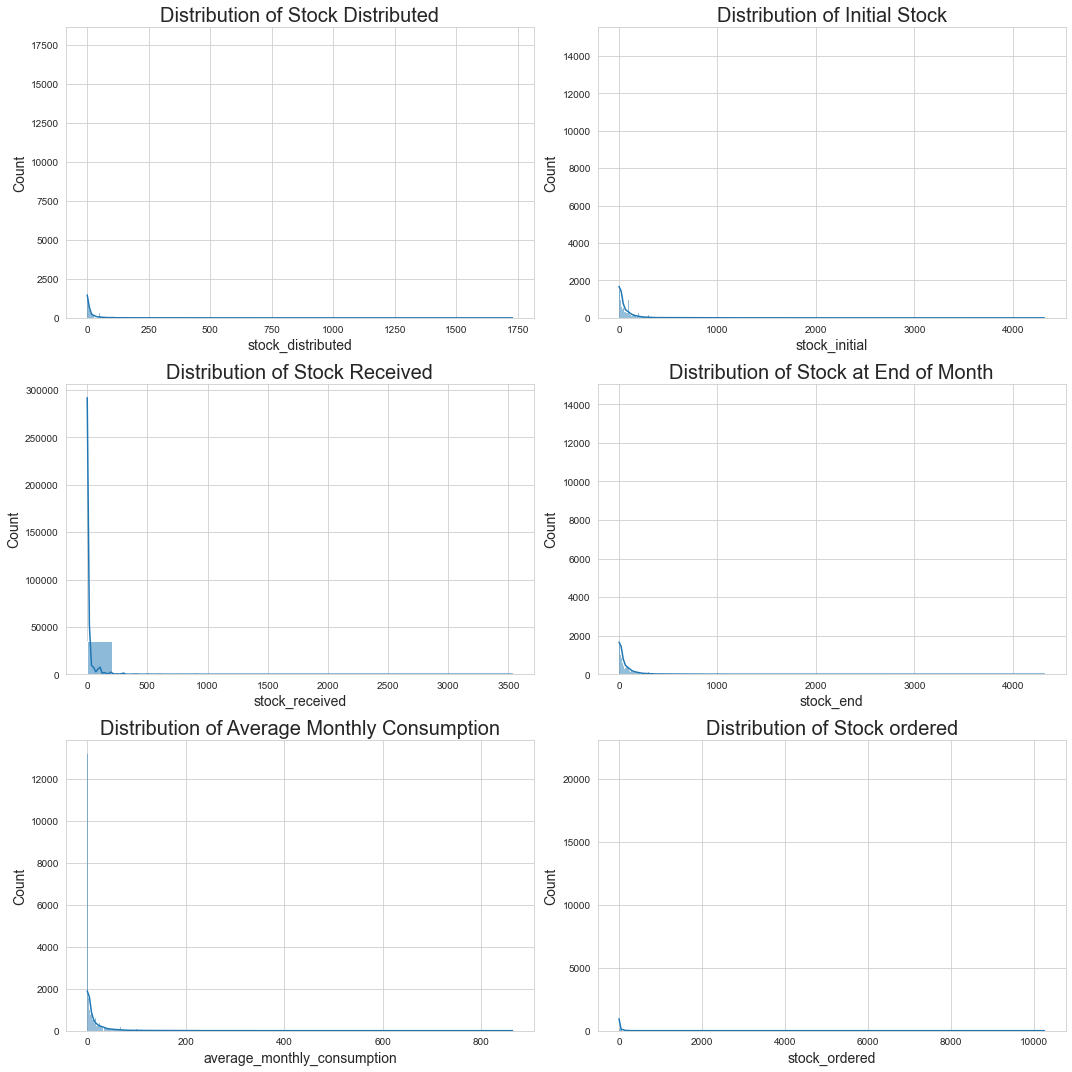

In [147]:
# Set style
sns.set_style("whitegrid")

# Set up the figure and axes
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Univariate analysis of key columns 
sns.histplot(df_merge['stock_distributed'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Stock Distributed', fontsize=20)

sns.histplot(df_merge['stock_initial'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Initial Stock', fontsize=20)

sns.histplot(df_merge['stock_received'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Stock Received', fontsize=20)

sns.histplot(df_merge['stock_end'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Stock at End of Month', fontsize=20)

sns.histplot(df_merge['average_monthly_consumption'], kde=True, ax=axs[2, 0])
axs[2, 0].set_title('Distribution of Average Monthly Consumption', fontsize=20)

sns.histplot(df_merge['stock_ordered'], kde=True, ax=axs[2, 1])
axs[2, 1].set_title('Distribution of Stock ordered', fontsize=20)

# Increase the font size of the axes labels
for ax in axs.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)

plt.tight_layout()
plt.show()


In [27]:
df_merge.stock_stockout_days.unique()

array([0], dtype=int64)

In [155]:
df_merge = df_merge.drop('stock_stockout_days', axis=1)

In [150]:
categorical_cols = [col for col in df_merge.columns if df_merge[col].dtype == 'object']
numerical_cols = [col for col in df_merge.columns if col not in categorical_cols ]

In [34]:
df_merge.groupby('site_type')['stock_distributed','stock_initial'].sum()

C:\Users\andil\AppData\Local\Temp\ipykernel_18496\956772517.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_merge.groupby('site_type')['stock_distributed','stock_initial'].sum()


,stock_distributed,stock_initial
site_type,,
Health Center,149593,503214
Hospital,367502,1710273
University Hospital/National Institute,10774,47730


In [35]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35753 entries, 0 to 35752
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         35753 non-null  int64  
 1   month                        35753 non-null  int64  
 2   region                       35753 non-null  object 
 3   district                     35753 non-null  object 
 4   site_code                    35753 non-null  object 
 5   product_code                 35753 non-null  object 
 6   stock_initial                35753 non-null  int64  
 7   stock_received               35753 non-null  int64  
 8   stock_distributed            35753 non-null  int64  
 9   stock_adjustment             35753 non-null  int64  
 10  stock_end                    35753 non-null  int64  
 11  average_monthly_consumption  35753 non-null  int64  
 12  stock_ordered                34990 non-null  float64
 13  site_type       

In [121]:

# Generate a summary table with average, median, and standard deviation of stock distributed by year and month
summary_table = df_merge.groupby(['year', 'month']).agg(
    avg_stock_distributed=pd.NamedAgg(column='stock_distributed', aggfunc='mean'),
    median_stock_distributed=pd.NamedAgg(column='stock_distributed', aggfunc='median'),
    std_stock_distributed=pd.NamedAgg(column='stock_distributed', aggfunc='std')
).reset_index()


In [123]:
summary_table

,year,month,avg_stock_distributed,median_stock_distributed,std_stock_distributed
0,2016,1,14.36,0.00,48.31
1,2016,2,12.35,0.00,44.19
2,2016,3,15.49,0.00,53.88
3,2016,4,12.32,0.00,35.25
4,2016,5,14.35,0.00,41.99
5,2016,6,15.20,0.00,47.39
6,2016,7,13.76,0.00,36.98
7,2016,8,14.06,0.00,38.73
8,2016,9,16.35,1.00,43.04
9,2016,10,17.42,1.00,48.44


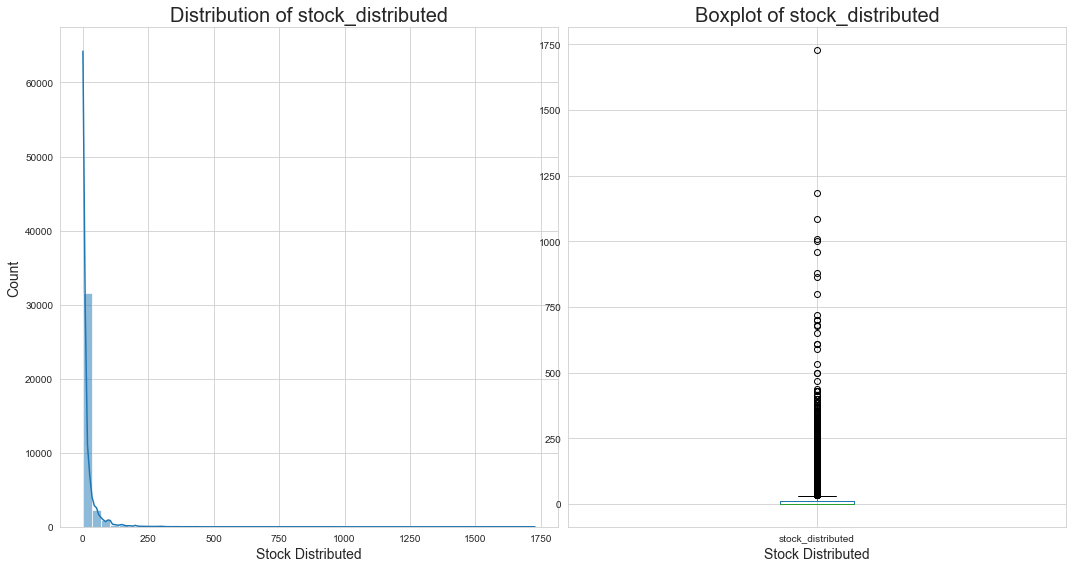

In [129]:
# Set up the matplotlib figure
col = 'stock_distributed'
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.histplot(df_merge[col], bins=50, kde=True)
plt.title(f'Distribution of {col}', fontsize=20)
plt.xlabel('Stock Distributed', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()

plt.subplot(1, 2, 2)
df_merge.boxplot(column=['stock_distributed'])
plt.title(f'Boxplot of {col}', fontsize=20)
plt.xlabel('Stock Distributed', fontsize=14)
plt.show()

In [43]:
def replace_extremes(dataset, column, method='IQR', extreme_value='median', multiplier=1.5):
    """
    Replace extreme values in a numerical column based on the IQR method and print the percentage of extreme values.
    
    Parameters:
    data (DataFrame): The DataFrame containing the numerical column.
    column (str): The name of the numerical column to process.
    method (str): Method to calculate the extreme value limit ('IQR' or 'STD', default is 'IQR').
    extreme_value (str): The value to replace extremes with ('median', 'mean', or a specific number, default is 'median').
    multiplier (float): The multiplier for IQR or STD to define extremes (default is 1.5).
    
    Returns:
    DataFrame: The DataFrame with extreme values replaced.
    """
    data = dataset.copy()
    if method == 'IQR':
        # Calculate Q1, Q3, and IQR
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        # Define extreme value limits
        lower_limit = Q1 - multiplier * IQR
        upper_limit = Q3 + multiplier * IQR
    elif method == 'STD':
        # Calculate mean and standard deviation
        mean = data[column].mean()
        std = data[column].std()
        # Define extreme value limits
        lower_limit = mean - multiplier * std
        upper_limit = mean + multiplier * std
    else:
        raise ValueError("Invalid method. Choose 'IQR' or 'STD'.")

    # Calculate extreme value counts
    lower_extremes_count = (data[column] < lower_limit).sum()
    upper_extremes_count = (data[column] > upper_limit).sum()
    total_extremes_count = lower_extremes_count + upper_extremes_count

    # Calculate and print the percentage of extreme values
    total_values_count = data.shape[0]
    percentage_extremes = (total_extremes_count / total_values_count) * 100
    print(f"Percentage of extreme values: {percentage_extremes:.2f}%")

    # Define replacement value
    if extreme_value == 'median':
        replacement = data[column].median()
    elif extreme_value == 'mean':
        replacement = mean
    else:
        replacement = extreme_value

    # Replace the extreme values
    data[column] = data[column].mask(data[column] < lower_limit, replacement)
    data[column] = data[column].mask(data[column] > upper_limit, replacement)

    return data


In [52]:
df_temp = replace_extremes(df_merge, 'stock_initial', multiplier=2.5)

Percentage of extreme values: 5.34%


<AxesSubplot:>

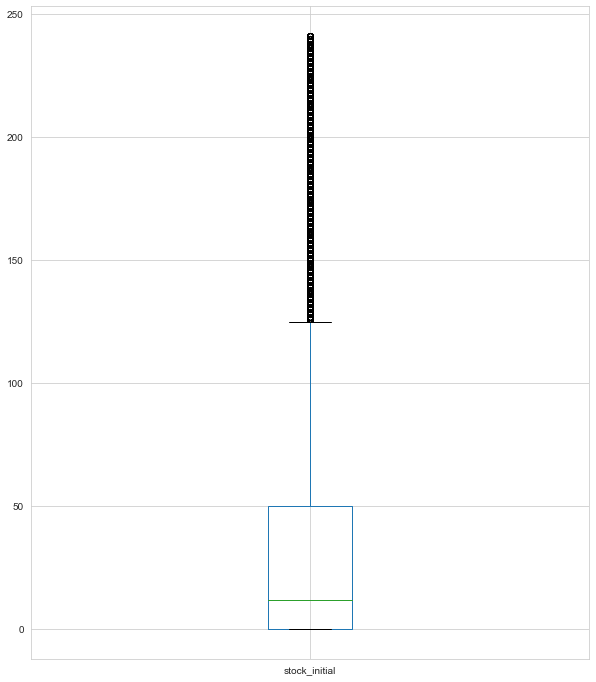

In [53]:
plt.figure(figsize=(10, 12))
df_temp.boxplot(column=['stock_initial'])

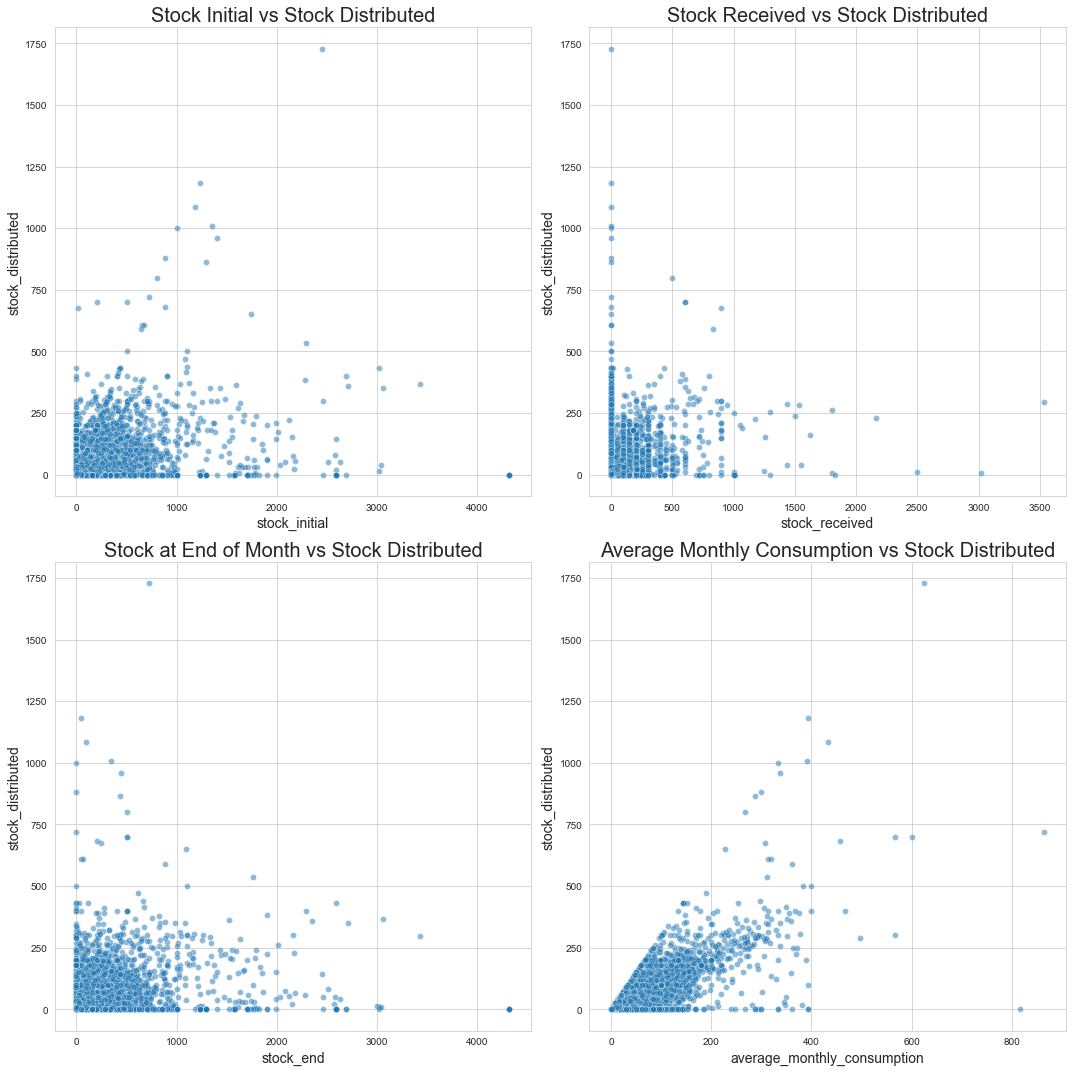

In [133]:
# Bivariate Analysis

# Set up the figure and axes
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

# Scatter plots for key columns vs. stock_distributed
sns.scatterplot(data=df_merge, x='stock_initial', y='stock_distributed', ax=axs[0, 0], alpha=0.5)
axs[0, 0].set_title('Stock Initial vs Stock Distributed', fontsize=20)

sns.scatterplot(data=df_merge, x='stock_received', y='stock_distributed', ax=axs[0, 1], alpha=0.5)
axs[0, 1].set_title('Stock Received vs Stock Distributed', fontsize=20)

sns.scatterplot(data=df_merge, x='stock_end', y='stock_distributed', ax=axs[1, 0], alpha=0.5)
axs[1, 0].set_title('Stock at End of Month vs Stock Distributed', fontsize=20)

sns.scatterplot(data=df_merge, x='average_monthly_consumption', y='stock_distributed', ax=axs[1, 1], alpha=0.5)
axs[1, 1].set_title('Average Monthly Consumption vs Stock Distributed', fontsize=20)

# Increase the font size of the axes labels
for ax in axs.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)

plt.tight_layout()
plt.show()


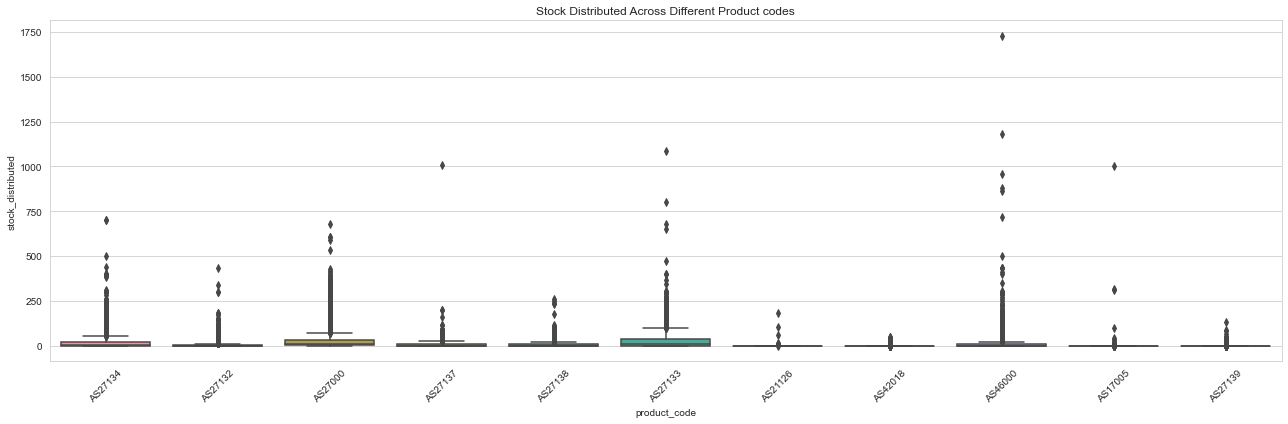

In [152]:
# Multivariate Analysis

# Set up the figure
plt.figure(figsize=(18, 6))

# Boxplot for stock distributed across different regions
sns.boxplot(data=df_merge, x='product_code', y='stock_distributed')
plt.title('Stock Distributed Across Different Product codes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


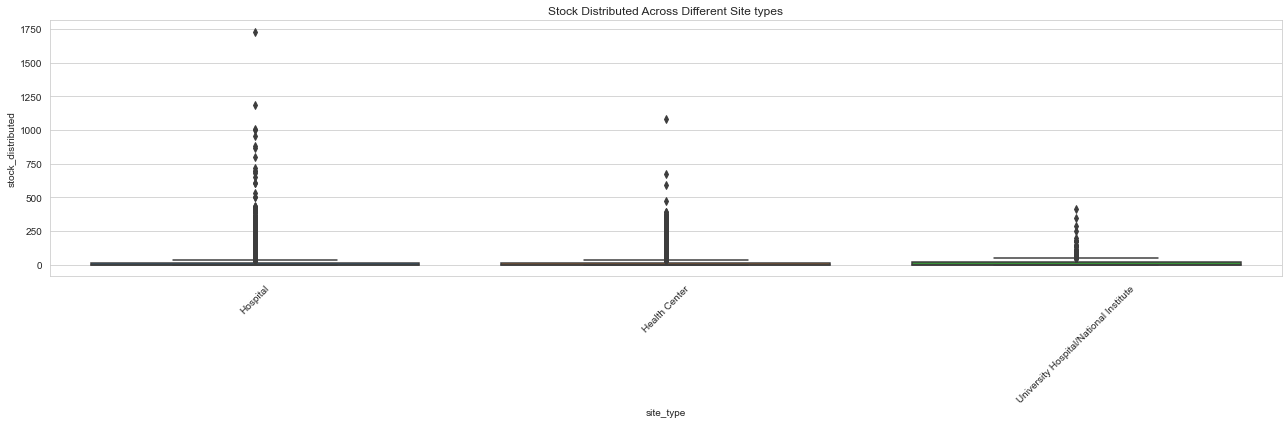

In [153]:

# Set up the figure
plt.figure(figsize=(18, 6))

# Boxplot for stock distributed across different regions
sns.boxplot(data=df_merge, x='site_type', y='stock_distributed')
plt.title('Stock Distributed Across Different Site types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


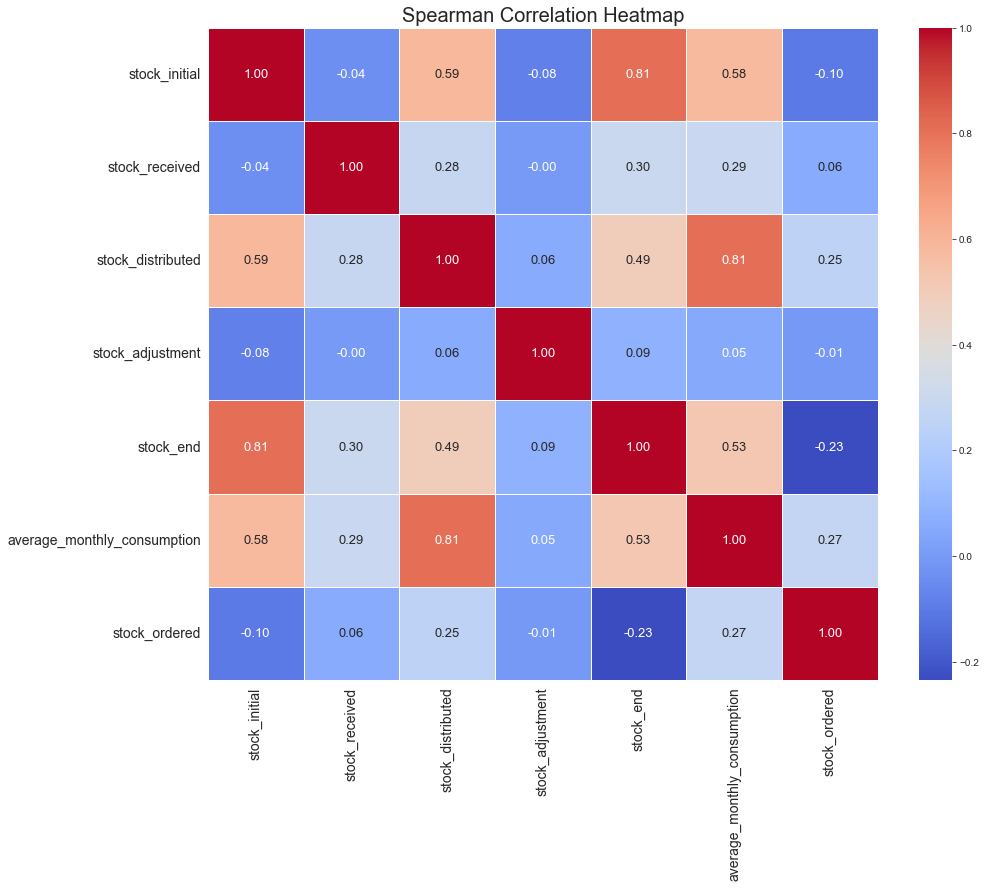

In [164]:
plt.figure(figsize=(15, 12))
sns.heatmap(df_merge.drop(columns=['year', 'month']).corr(method='spearman'),
            cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5,
            annot_kws={"size": 13})  # Set annotation font size

plt.title("Spearman Correlation Heatmap", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


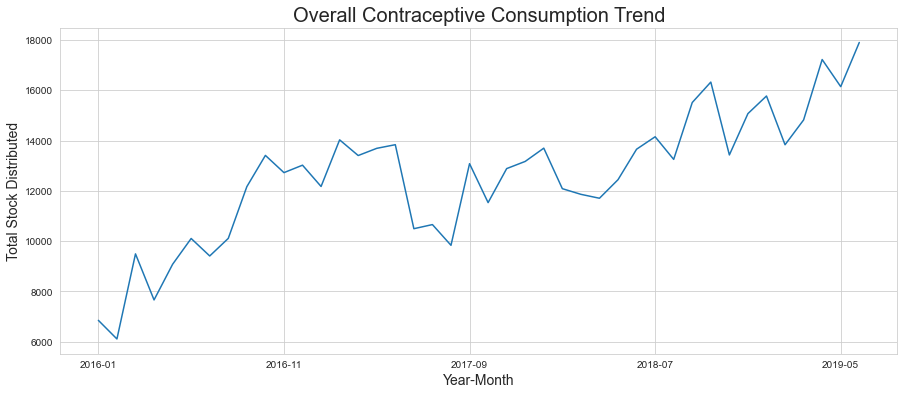

In [165]:
# Creating a 'year-month' column
df_merge['date'] = df_merge['year'].astype(str) + '-' + df_merge['month'].astype(str).str.zfill(2)

# Grouping by 'year_month' and summing up the stock distributed
overall_trend = df_merge.groupby('date')['stock_distributed'].sum()

# Plotting the overall trend
plt.figure(figsize=(15, 6))
overall_trend.plot()
plt.title('Overall Contraceptive Consumption Trend', fontsize=20)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Total Stock Distributed', fontsize=14)
plt.grid(True)
plt.show()


Here's the overall trend of contraceptive consumption:
    1. The plot provides an overview of the consumption of contraceptives from Jan 2016 to late 2019.
    2. There are noticeable peaks and troughs, suggesting some seasonality or external factors affecting the consumption.
    3. For instance, there's a noticeable drop in consumption around mid-2017 and late 2018.
    4. The loverall trend shows a rising trend in consumption.

In [42]:
pd.options.display.float_format = '{:.0f}'.format
df_merge.loc[:, ~df_merge.columns.isin(['month', 'year'])].describe()

,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_ordered
count,35753,35753,35753,35753,35753,35753,34990
mean,63,15,15,1,64,15,27
std,169,71,40,38,171,33,107
min,0,0,0,-1440,0,0,0
25%,0,0,0,0,0,0,0
50%,12,0,1,0,13,3,0
75%,69,0,13,0,70,16,20
max,4320,3534,1728,3003,4320,864,10240


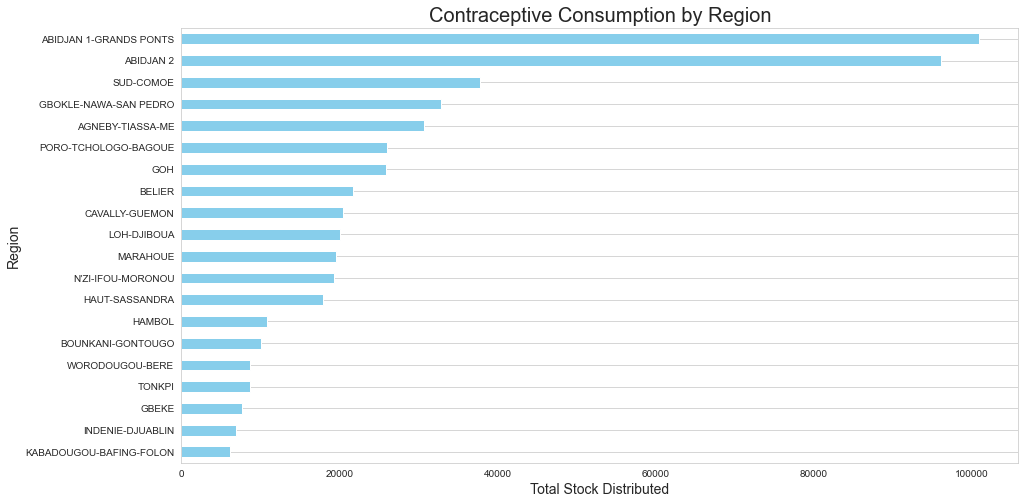

In [134]:
# Consumption by Regions

# Grouping by region and summing up the stock distributed
region_consumption = df_merge.groupby('region')['stock_distributed'].sum().sort_values()

# Plotting the consumption by regions
plt.figure(figsize=(15, 8))
region_consumption.plot(kind='barh', color='skyblue')
plt.title('Contraceptive Consumption by Region', fontsize=20)
plt.xlabel('Total Stock Distributed', fontsize=14)
plt.ylabel('Region', fontsize=14)
plt.grid(axis='x')
plt.show()


The bar chart illustrates the contraceptive consumption by region:

- The Abidjan 1-Grands Ponts and Abidjan 2 regions has the highest consumption of contraceptives. This could be due to a larger population or better access to healthcare facilities.
- Sud-comoe also show significant consumption levels.
- KABADOUGOU-BAFING-FOLON and INDENIE-DJUABLIN regions have the lowest contraceptive consumption.

This distribution can be influenced by various factors, including population density, availability of health service delivery sites, awareness and accessibility of contraceptives, and regional health campaigns.

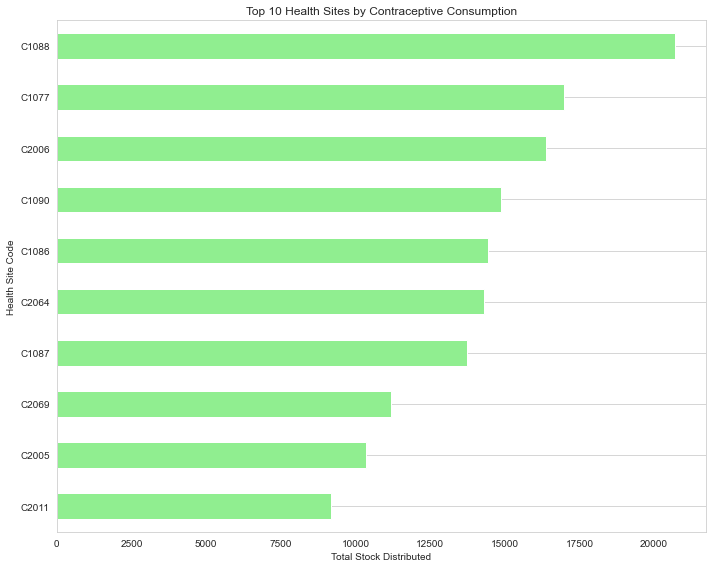

In [27]:
# 3. Consumption by Health Sites

# Grouping by site_code and summing up the stock distributed
site_consumption = df_merge.groupby('site_code')['stock_distributed'].sum().sort_values()

# Picking top 10 and bottom 10 health sites for visualization
top_10_sites = site_consumption.tail(10)
bottom_10_sites = site_consumption.head(10)

# Plotting the consumption by health sites
plt.figure(figsize=(10, 8))

# Top 10 sites
top_10_sites.plot(kind='barh', color='lightgreen')
plt.title('Top 10 Health Sites by Contraceptive Consumption')
plt.xlabel('Total Stock Distributed')
plt.ylabel('Health Site Code')
plt.grid(axis='x')

plt.tight_layout()
plt.show()


In [178]:
df_merge.groupby(['site_type', 'date'])['stock_distributed'].sum().reset_index()

,site_type,date,stock_distributed
0,Health Center,201601,1455
1,Health Center,201602,1585
2,Health Center,201603,2306
3,Health Center,201604,2241
4,Health Center,201605,2611
...,...,...,...
121,University Hospital/National Institute,201902,253
122,University Hospital/National Institute,201903,393
123,University Hospital/National Institute,201904,481
124,University Hospital/National Institute,201905,381


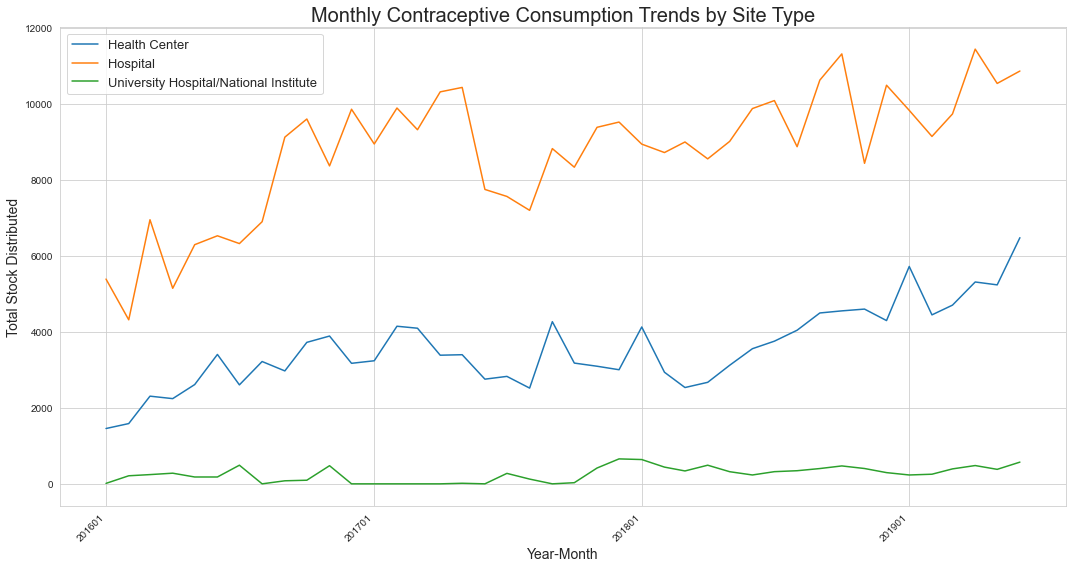

In [196]:
# Ensure that year and month are integer types
df_merge['year'] = df_merge['year'].astype(int)
df_merge['month'] = df_merge['month'].astype(int)

# Convert year and month to string, add a leading zero to month if necessary, and combine
df_merge['date'] = df_merge['year'].astype(str) + df_merge['month'].apply(lambda x: f'{x:02d}')

# Convert the combined string back to integer
df_merge['date'] = df_merge['date'].astype(int)

# Sort the dataframe by the new date variable
df_merge = df_merge.sort_values(by='date')

# Convert 'date' to string, then to datetime
df_merge['date'] = pd.to_datetime(df_merge['date'].astype(str), format='%Y%m')

# Grouping data by site type and 'date' to sum the stock distributed
monthly_site_type_consumption = df_merge.groupby(['site_type', 'date'])['stock_distributed'].sum().reset_index()

# Plotting monthly trends for each site type
plt.figure(figsize=(15, 8))

for site in monthly_site_type_consumption['site_type'].unique():
    subset = monthly_site_type_consumption[monthly_site_type_consumption['site_type'] == site]
    plt.plot(subset['date'], subset['stock_distributed'], label=site)

# Formatting the date on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.title('Monthly Contraceptive Consumption Trends by Site Type', fontsize=20)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Total Stock Distributed', fontsize=14)

# Rotate and align the tick labels so they look better
plt.xticks(rotation=45, ha='right')

# Update rcParams to increase the legend font size globally
rcParams.update({'legend.fontsize': 13})

plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



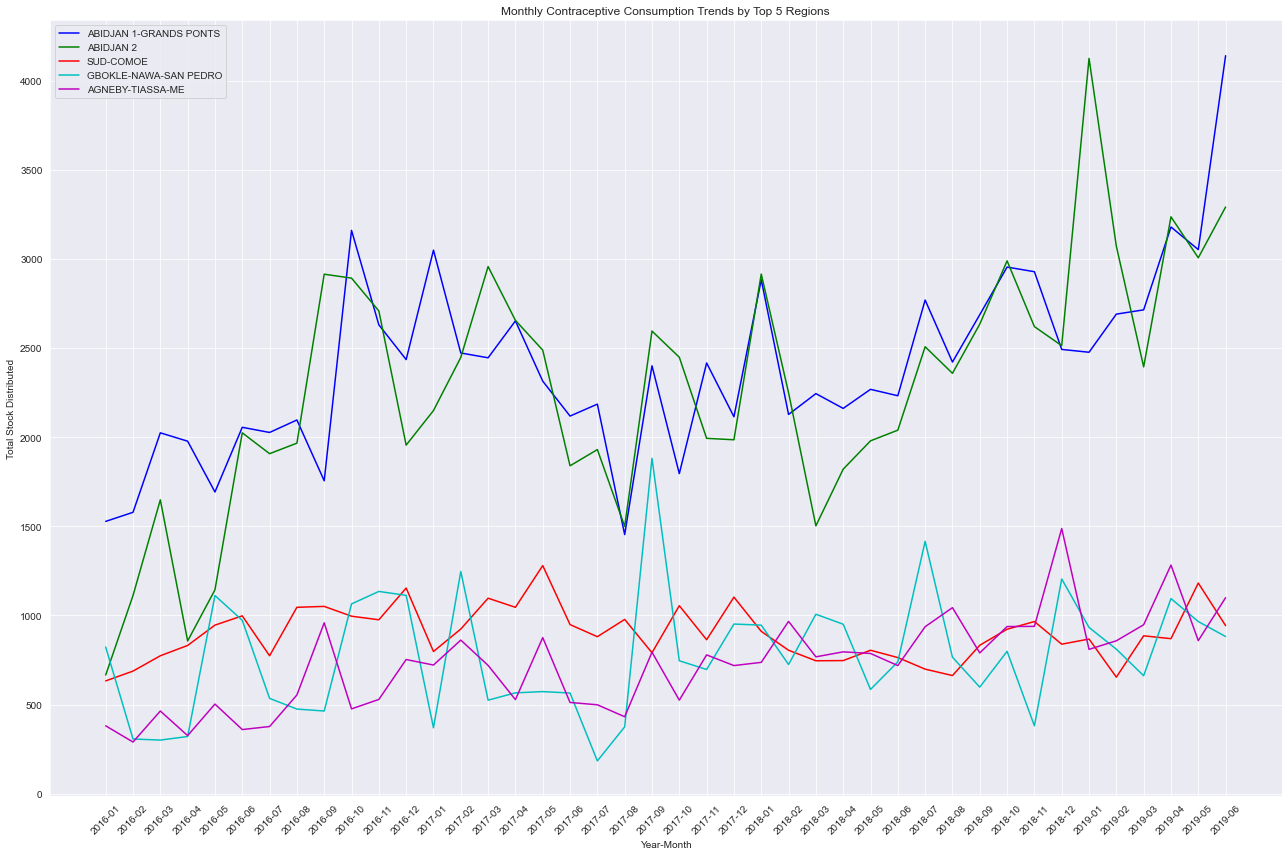

In [80]:
# Grouping by region and year_month to sum the stock distributed

monthly_region_consumption = df_merge.groupby(['region', 'date'])['stock_distributed'].sum().reset_index()

# Identifying the top 5 regions in terms of overall consumption
top_5_regions = df_merge.groupby('region')['stock_distributed'].sum().sort_values(ascending=False).head(5).index

# Filtering the monthly_region_consumption dataframe for these top 5 regions
top_5_regions_monthly = monthly_region_consumption[monthly_region_consumption['region'].isin(top_5_regions)]

# Selecting distinct colors for better visualization
distinct_colors = ['b', 'g', 'r', 'c', 'm']

# Plotting monthly trends for each of the top 5 regions
plt.figure(figsize=(18, 12))
for idx, region in enumerate(top_5_regions):
    subset = top_5_regions_monthly[top_5_regions_monthly['region'] == region]
    plt.plot(subset['date'], subset['stock_distributed'], label=region, color=distinct_colors[idx])

plt.title('Monthly Contraceptive Consumption Trends by Top 5 Regions')
plt.xlabel('Year-Month')
plt.ylabel('Total Stock Distributed')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


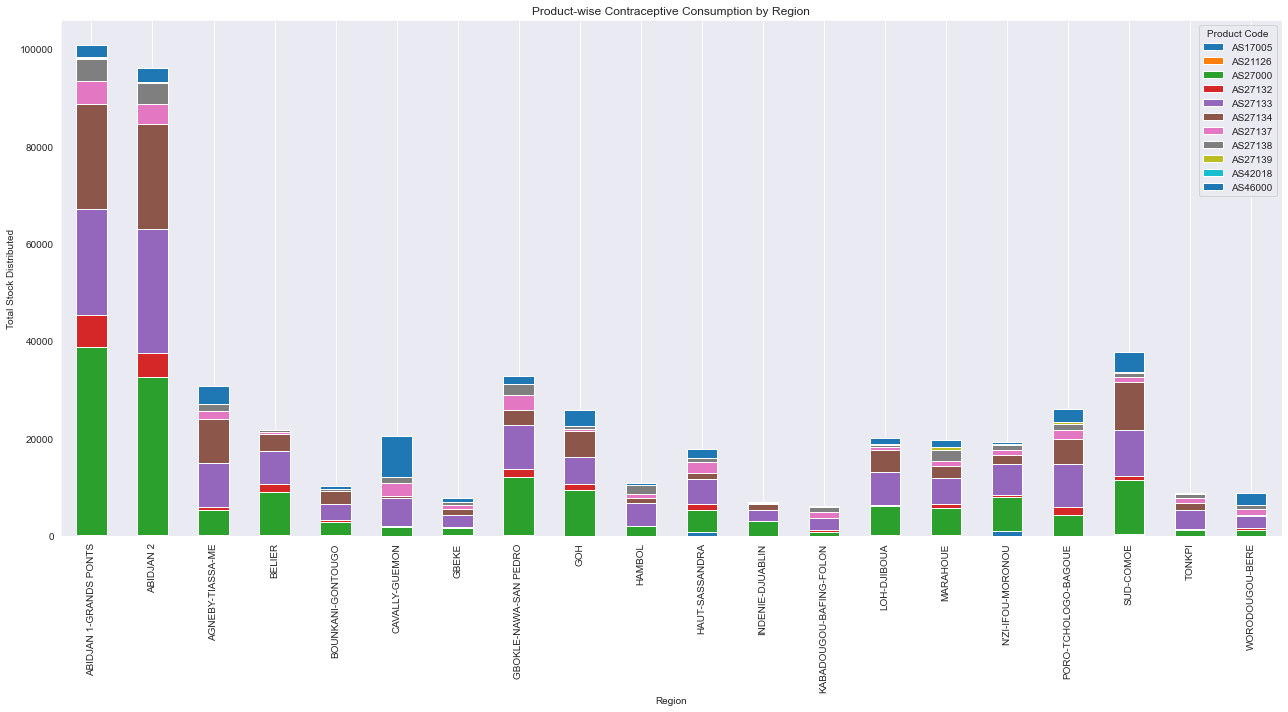

In [79]:
# 5. Product-wise Consumption by Region

# Grouping by region, product_code, and summing up the stock distributed
product_region_consumption = df_merge.groupby(['region', 'product_code'])['stock_distributed'].sum().reset_index()

# Pivoting the dataframe for better visualization
product_region_pivot = product_region_consumption.pivot(index='region', columns='product_code', values='stock_distributed')

# Plotting product-wise consumption for each region
product_region_pivot.plot(kind='bar', stacked=True, figsize=(18, 10))
plt.title('Product-wise Contraceptive Consumption by Region')
plt.xlabel('Region')
plt.ylabel('Total Stock Distributed')
plt.legend(title='Product Code')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [54]:
df_merge.tail()

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_ordered,site_type
35748,2016,7,LOH-DJIBOUA,GUITRY,C2055,AS27133,0,50,25,0,25,8,25.0,Hospital
35749,2016,7,LOH-DJIBOUA,GUITRY,C2055,AS27138,150,0,0,0,150,0,0.0,Hospital
35750,2016,7,LOH-DJIBOUA,GUITRY,C2055,AS27132,1,10,4,0,7,13,0.0,Hospital
35751,2016,7,LOH-DJIBOUA,GUITRY,C2055,AS27134,8,0,8,0,0,10,0.0,Hospital
35752,2016,7,LOH-DJIBOUA,GUITRY,C2055,AS17005,48,0,2,0,46,1,0.0,Hospital


In [56]:
# Function to print out the number of missing values and the percentages for columns with at least a missing value.
def missing_percentage(df):
    # Calculate the total missing values and the percentage missing for each column
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) * 100

    # Create a new dataframe from the total and percentage
    missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Missing %'])

    # Return the dataframe sorted by percentage of missing values in descending order
    return missing_data[missing_data['Total Missing'] > 0]

missing_percentage(df_merge)

,Total Missing,Missing %
stock_ordered,763,2.134087


In [54]:
# Generating a pands profile report for a general EDA
# profile_ex = ProfileReport(df_merge, explorative=True)
# profile_ex.to_file('profile_report_explorative.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [60]:
numerical_cols

['year',
 'month',
 'stock_initial',
 'stock_received',
 'stock_distributed',
 'stock_adjustment',
 'stock_end',
 'average_monthly_consumption',
 'stock_ordered']

In [61]:
categorical_cols

['region', 'district', 'site_code', 'product_code', 'site_type']

In [111]:
# Separate numerical and categorical columns, excluding the target variable
numerical_columns = df_merge.select_dtypes(include=[np.number]).drop(columns=['stock_distributed','year','month'])
categorical_columns = df_merge.select_dtypes(exclude=[np.number])

In [112]:
# Initialize summary tables
numerical_summary_table = pd.DataFrame()
categorical_summary_table = pd.DataFrame()

In [200]:

# # Fill in the summary table for numerical columns
numerical_summary_table['Variable'] = numerical_columns.columns
numerical_summary_table['Mean'] = numerical_columns.mean().values
numerical_summary_table['Standard Deviation'] = numerical_columns.std().values
numerical_summary_table['% Missing Values'] = (numerical_columns.isnull().mean() * 100).values
# numerical_summary_table['Spearman Correlation with Target'] = numerical_columns.apply(lambda x: spearmanr(df_merge['stock_distributed'], x, nan_policy='omit')[0]).values
numerical_summary_table['KS Test p-value for Normality'] = numerical_columns.apply(lambda x: ks_2samp(x.dropna(), np.random.normal(x.mean(), x.std(), size=len(x.dropna())))[1]).values

 
# Define a function to calculate ANOVA p-value for each categorical variable
def anova_test(group_col, target_col):
    # Get unique categories
    groups = df_merge[group_col].unique()
    # Prepare list of group samples
    samples = [df_merge[df_merge[group_col] == group][target_col] for group in groups]
    # Perform ANOVA and return the p-value
    return f_oneway(*samples)[1]

# # Fill in the summary table for categorical columns
categorical_summary_table['Variable'] = categorical_columns.columns
categorical_summary_table['Number of Unique Categories'] = categorical_columns.nunique().values
categorical_summary_table['Mode'] = categorical_columns.apply(lambda x: x.mode()[0]).values
categorical_summary_table['% Missing Values'] = (categorical_columns.isnull().mean() * 100).values
categorical_summary_table['ANOVA Test p-value with Target'] = [
    anova_test(x, 'stock_distributed') for x in categorical_columns
]


In [201]:
categorical_summary_table

,Variable,Number of Unique Categories,Mode,% Missing Values,Chi-Squared Test p-value with Target,ANOVA Test p-value with Target
0,region,20,ABIDJAN 2,0.00,0.00,0.00
1,district,80,KOUMASSI-PORT BOUET-VRIDI,0.00,0.00,0.00
2,site_code,155,C1015,0.00,0.00,0.00
3,product_code,11,AS27133,0.00,0.00,0.00
4,site_type,3,Hospital,0.00,0.00,0.33


In [115]:
numerical_summary_table

,Variable,Mean,Standard Deviation,% Missing Values,KS Test p-value for Normality
0,stock_initial,63.25,168.66,0.00,0.00
1,stock_received,14.85,70.63,0.00,0.00
2,stock_adjustment,0.96,37.88,0.00,0.00
3,stock_end,64.29,170.85,0.00,0.00
4,average_monthly_consumption,14.61,32.52,0.00,0.00
5,stock_ordered,26.66,107.17,2.13,0.00


In [56]:
df_merge.to_parquet('../Data/Interim/merged.parquet', engine='pyarrow')
